# Projeto de Processamento Digital de Imagens - Esteganografia

** Universidade Federal do Ceará - Departamento de Teleinformática **

** Disciplina : Introdução a Processamento Digital de Imagens **

** Professor : pauloregisms@gmail.com **
   

## 1. Equipe
- Joel Oliveira Ribeiro
- Matheus Mendes
- Vanessa Rodrigues
- Sérgio Luis

## 2. Introdução  
### 2.1. Breve explicação

A esteganografia digital consiste em ocultar informações (arquivos, imagens, audios e etc) em outros arquivos. No nosso caso, iremos ocultar as informações em outras imagens.

fonte : https://www.vivaolinux.com.br/artigo/Esteganografia-e-Esteganalise-transmissao-e-deteccao-de-informacoes-ocultas-em-imagens-digitais

### 2.2 Por que utilizamos Python ?

Optamos por utilizar a linguagem Python em nosso trabalho por possuir poderosas bibliotecas de manipulações gráficas como a PIL (Python Image Library) e o OpenCV nas quais ajudarão no processamento de imagens , além de muitas outras tais como Numpy, Matplotlib e etc ... 

In [1]:
# Importando algumas das bibliotecas que serão úteis para apresentação desse trabalho 

% matplotlib inline

import numpy as np
import scipy.misc 
import pylab as plb
import cv2
from matplotlib import pyplot as plt 
import hashlib

## 3. Procedimento e Discussão Técnica
### 3.1 Imagem a ser utilizada 

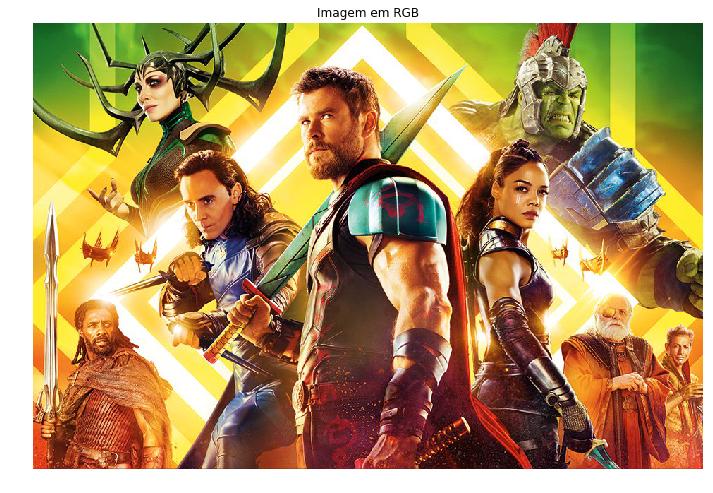

In [2]:
# Carregando a imagem escolhida para que seja utilizada para ocultar informações
imgRGB = cv2.imread('thor_ragnarok.jpg')
imgRGB = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2RGB)

# mostrando a imagem
plb.figure(figsize=(12,12))
plb.title('Imagem em RGB')
plb.imshow(imgRGB) ; plb.axis('off') ; #plb.colorbar()

#### Algumas informações que podemos extrair da imagem

In [3]:
#1. Tamanho da imagem
print(imgRGB.shape) # dimensão

#2. Tipo da imagem
print(imgRGB.dtype) # tipo

(633, 950, 3)
uint8


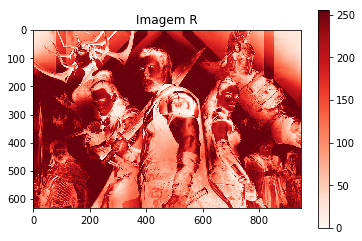

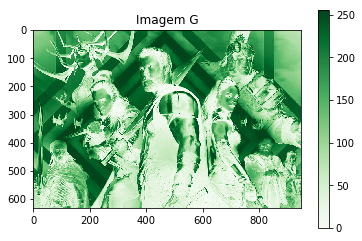

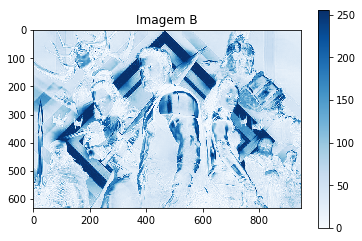

In [4]:
#3. Mostrando as matrizes R , G , B separadamente 

plb.figure(); plb.imshow(imgRGB[:,:,0],cmap='Reds');   plb.colorbar();   plb.title('Imagem R')  

plb.figure(); plb.imshow(imgRGB[:,:,1],cmap='Greens'); plb.colorbar();   plb.title('Imagem G') 

plb.figure(); plb.imshow(imgRGB[:,:,2],cmap='Blues');  plb.colorbar();    plb.title('Imagem B') 

### 3.2 Máscaras Binárias
Usaremos 2 tipos de mascaras que são AND (&) e OR (|) 
Usaremos a mascara do tipo AND para mudarmos os bits que quisermos para o valor 0
Usaremos a mascara do tipo OU para mudarmos os bits que quisermos para o valor 1

Exemplos abaixo

In [5]:
#Formato de um Pixel
print ('Valor Inteiro')
print(42)

#Representação dos valores RGB EM BINARIO
print('Representação binaria')
print ("{0:b}".format(42))


#Mudar o valor de todos os bits para 1 , usaremos a mascara 21 que tem seu binário 010101
print('Nova Representação binaria')
value = 42 | 21
print ("{0:b}".format(value))

#Mudar o valor de todos os bits para 0 , usaremos a mascara 21 que tem seu binário 010101
print('Nova Representação binaria')
value = 42 & 0
print ("{0:b}".format(value))




Valor Inteiro
42
Representação binaria
101010
Nova Representação binaria
111111
Nova Representação binaria
0


### 3.3 Método da substituição do Bit Menos Significativo (LSB)

O processo de esteganografia digital em uma imagem consiste na modificação de alguns bits que compõem cada pixel, para que passem a armazenar alguns bits do dado/arquivo que será embutido. Podemos utilizar o bit menos significativo (LSB) , pois quando modificado produz alterações mínimas nas cores da imagem. 

(633, 950, 3)
Valores de cada pixel antes da modificação do bit menos significativo
[17 88 30]
Representação binaria dos valores
['10001', '1011000', '11110']
Modificando os bits menos significativos para 1
[17 89 31]
Representação binaria dos valores modificados
['10001', '1011001', '11111']


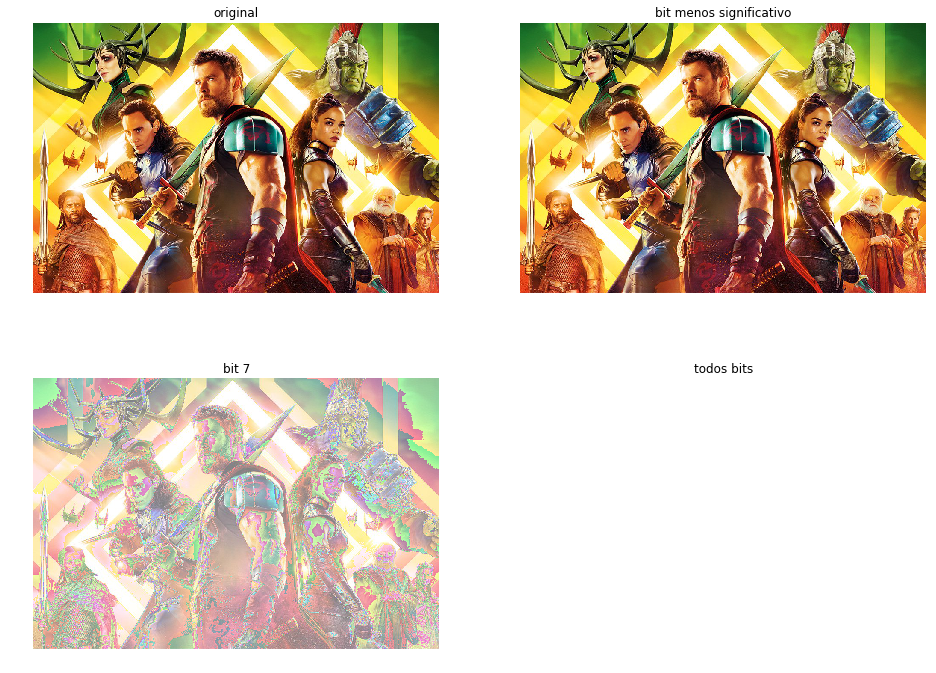

In [6]:
#Tamanho da Imagem
print(imgRGB.shape)

#Formato de um Pixel
print ('Valores de cada pixel antes da modificação do bit menos significativo')
print(imgRGB[1,1,:])

#Representação dos valores RGB EM BINARIO
print('Representação binaria dos valores')
print (["{0:b}".format(imgRGB[1,1,0]),"{0:b}".format(imgRGB[1,1,1]),"{0:b}".format(imgRGB[1,1,2])])

#Modificação dos bits menos significativos
print('Modificando os bits menos significativos para 1')
print (imgRGB[1,1,:] | 1)

#Representação dos valores RGB EM BINARIO após modificar os bits
print('Representação binaria dos valores modificados')
print (["{0:b}".format(imgRGB[1,1,0] | 1),"{0:b}".format(imgRGB[1,1,1] | 1),"{0:b}".format(imgRGB[1,1,2] | 1)])

#Exemplo na imagem
plb.figure(figsize=(16,12))
plb.subplot(2,2,1)
plb.imshow(imgRGB)
plb.axis('off')
plb.title('original')

plb.subplot(2,2,2)
plb.imshow(imgRGB | 1)
plb.axis('off')
plb.title('bit menos significativo')

plb.subplot(2,2,3)
plb.imshow(imgRGB | 128)
plb.axis('off')
plb.title('bit 7')

plb.subplot(2,2,4)
plb.imshow(imgRGB | 255)
plb.axis('off')
plb.title('todos bits')

### 3.4 Vetorizando a Imagem
Como temos 3 matrizes uma para cada canal (RGB) e iremos precisar modificar o primeiro bit de cada valor , para facilitar o processo e não precisarmos ficar alterando o index do canal , transformamos a imagem em um vetor linha utilizando a função flatten, onde podemos alterar cada valor sequencialmente , e somente no fim usamos a função reshape para voltarmos ao formato inicial.

(1804050,)


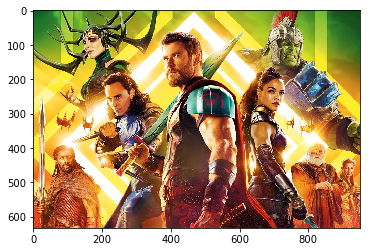

In [7]:
flattened = imgRGB.flatten()
print(flattened.shape)
flat2 = flattened.reshape(imgRGB.shape)
plb.imshow(flat2)

### 3.5 Limite do Tamanho
Temos um limite para o quanto de informação podemos esconder na imagem para que não haja uma perda de qualidade muito grande da imagem original.

Neste trabalho, recorreremos a substituição de 2 tipos de informação na imagem :

** Primeiro tipo: escondendo uma string ** 

Estamos usando somente o bit menos significate de cada byte da imagem, então para nossa imagem de resolução 633x950. Temos um total de 633x950x3 = 1,804,050 bytes , e podemos esconder 1 bit por cada byte. Então temos o limite de 1,804,050 bits ou 225,506 bytes de informação.

** Segundo tipo: escondendo uma imagem **

Estamos redimensionando a imagem secreta para ficar com o mesmo tamanho da imagem original , por isso conseguimos esconder exatamente a segunda imagem , sem nos preocuparmos com o tamanho da imagem secreta.

# 3.6 Definindo as funções úteis

#### 3.6.1. Para a resolução dos problemas que envolvem a esteganografia, defineremos as seguintes funções 

In [8]:
# Função para atribuir o valor bitval à posição pos do byte. 
def setbit(byte, bitval, pos):
    mask1 = np.uint8(2**pos)
    mask0 = np.invert(mask1, dtype=np.uint8)
    
    if(pos> 7):
        raise Exception('Valor de pos de set do bit inválida para os 8 bits disponíveis')
    
    if (bitval):
        return (byte | mask1)
    else:
        return (byte & mask0)

# Função que obtém o bit na posição pos de byte
def getbit(byte, pos):
    
    if(pos> 7):
        raise Exception('Valor de pos de get do bit inválida para os 8 bits disponíveis')
    
    return (byte >> pos) & 1    

#### 3.6.2 Funções que serão úteis para a esteganografia do primeiro tipo : Dissimular uma determinada String 

In [9]:
# Função para transformar uma string msg em uma sequência de bits.
def str2bin(msg):

    seq = []
    for letter in msg:
        l = ord(letter)  # representação numérica da string letter
        
        # adiciona os 7 bits de cada letra em seq. Ao final, passar para outra letra.
        k = 0
        while k < 7:
            seq.append( l & 1 )
            l = l >> 1
            k += 1
    
    return seq

#  Função para transformar uma sequência de bits seq em uma string
def bin2str(seq):
    
    i, k, ordchar = (0,0,0)
    s = str()
    
    # junta 7 bits e calcula o seu caractere correspondente. Repete até agrupar todos os bits da sequência
    while i < len(seq):
        ordchar = setbit(ordchar, seq[i], k)
        i += 1
        k += 1
        if k == 7:
            s += chr(ordchar)
            ordchar, k = (0,0)
    
    return s

In [10]:
# Vetorizando a imagem em um único vetor
def flatten_img(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    return np.concatenate((r.flatten(), g.flatten(), b.flatten()))

# Escondendo a mensagem secreta na imagem original
def stego_str(cover, msg, verbose=False):

    # transforma sequência de texto em bits
    seq = str2bin(msg)
    
    # vetoriza a imagem cover
    stego = flatten_img(cover)
    
    # codifica os pixels da imagem cover vetorizada
    for k in range(len(seq)):
        antes = stego[k]
        stego[k] = setbit(stego[k], seq[k], 0)
        if verbose:
            print ('antes: {:b} ({}), seq[{}]: {:b}, depois: {:b} ({})'.format(antes, antes, k, seq[k], stego[k], stego[k]))
    
    # recupera os canais rgb
    refshape = cover[:,:,0].shape     # dimensões de um canal
    sz = cover[:,:,0].size            # quantidade de pixels em um canal
    
    sr = stego[0:sz].reshape(refshape)
    sg = stego[sz:2*sz].reshape(refshape)
    sb = stego[2*sz:3*sz].reshape(refshape)
    
    # cria nova imagem a partir dos canais rgb recuperados
    simg = np.zeros(cover.shape, dtype=np.uint8)
    simg[:,:,0] = sr
    simg[:,:,1] = sg
    simg[:,:,2] = sb
    
    return simg

# Lê nread bits dos LSBs do estego-objeto simg
def unstego_str(simg, nread):
    # vetoriza a imagem cover
    sv = flatten_img(simg)
    
    # checa validade do argumento
    if nread > simg.size:
        raise Exception('Número de bits a serem lidos é maior que a quantidade de bits da imagem')
           
    # forma sequencia de lsbs
    seq = []
    for k in range(nread):
        seq.append(getbit(sv[k],0))
        
    return bin2str(seq)


#### 3.6.3 Funções que serão úteis para a esteganografia do segundo tipo : Dissimular uma determinada Imagem

In [11]:
def stego_img(coverimg, secretimg):
    ''' Dissimula secretimg em coverimg '''
    
    # redimensiona a imagem secreta para o mesmo tamanho da imagem de cobertura
    secretimg = scipy.misc.imresize(secretimg, coverimg.shape)
    
    stegoimg = np.zeros(coverimg.shape, dtype=np.uint8)
    
    for row in range(coverimg.shape[0]):
        for col in range(coverimg.shape[1]):
            for channel in range(coverimg.shape[2]):
                # Seta os bits nas posições 6 e 7 da imagem secreta nas posições 0 e 1 da imagem cover, respectivamente
                stegoimg[row, col, channel] = setbit(coverimg[row, col, channel], getbit(secretimg[row, col, channel], 7), 1)
                stegoimg[row, col, channel] = setbit(stegoimg[row, col, channel], getbit(secretimg[row, col, channel], 6), 0)   
                
    return stegoimg
                
def unstego_img(stegoimg): 
    ''' Extrai a imagem secreta de stegoimg '''
    recimg = np.zeros(stegoimg.shape, dtype=np.uint8)
    
    for row in range(stegoimg.shape[0]):
        for col in range(stegoimg.shape[1]):
            for channel in range(stegoimg.shape[2]):
                # Seta os bits nas posições 0 e 1 da imagem secreta nas posições 6 e 7 da imagem extraida, respectivamente
                recimg[row, col, channel] = setbit(recimg[row, col, channel], getbit(stegoimg[row, col, channel], 1), 7)                  
                recimg[row, col, channel] = setbit(recimg[row, col, channel], getbit(stegoimg[row, col, channel], 0), 6)
                
    return recimg

### 3.7 Integridade dos dados
Para garantirmos que os dados que escondemos nas imagens não foram alterados, iremos criar uma hash MD5 da nossa informação antes de adicionar na imagem , e então iremos criar outra hash MD5 após recurarmos as informações. Se as duas hashs forem iguais podemos afirmar que a infomação não foi alterada.

## 4. Resultados

### 4.1 Dissimulando uma string em uma imagem

In [12]:
# A mensagem/string a ser escondida
msg = 'Thor: Ragnarok entende a essencia do personagem e entrega um longa divertidissimo que evoca o senso de aventura que sempre povoou as HQs da Casa das Ideias ... certamente se consagra como um dos filmes mais engracados e divertidos do genero, retomando aquele papel descontraido das historias em quadrinhos despretensiosas, leves, que eram regra ate a metade do seculo passado. (Fonte : Jovem Nerd)'
hash1 = hashlib.md5(msg.encode(encoding='UTF-8',errors='strict'))
print(msg)
print(hash1.digest())

Thor: Ragnarok entende a essencia do personagem e entrega um longa divertidissimo que evoca o senso de aventura que sempre povoou as HQs da Casa das Ideias ... certamente se consagra como um dos filmes mais engracados e divertidos do genero, retomando aquele papel descontraido das historias em quadrinhos despretensiosas, leves, que eram regra ate a metade do seculo passado. (Fonte : Jovem Nerd)
b'\x16O\x8e\x1f\x8d<Vo\xe7\xd4\xa3\xe67F\x15"'


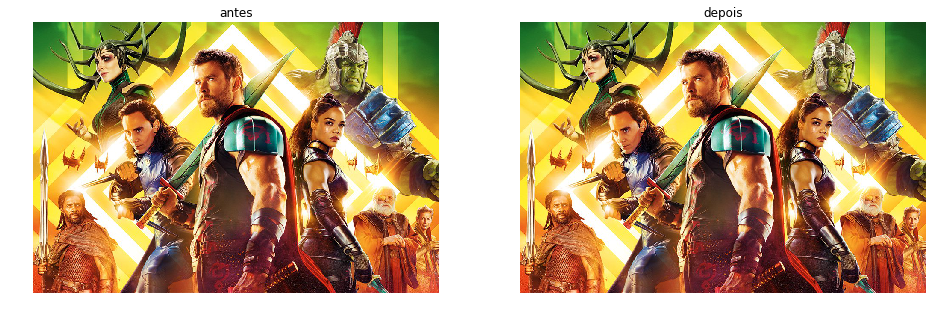

In [13]:
# Chamando as funções de esteganogradia para dissimulação de uma string em uma imagem
simg = stego_str(imgRGB, msg)

plb.figure(figsize=(16,12))
plb.subplot(1,2,1)
plb.imshow(imgRGB)
plb.axis('off')
plb.title('antes')

plb.subplot(1,2,2)
plb.imshow(simg)
plb.axis('off')
plb.title('depois')

In [14]:
msg2 = unstego_str(simg, (len(msg)*7)) # a multiplicacao por 7 eh por cada letra ser representada por 7 bits
hash2 = hashlib.md5(msg2.encode(encoding='UTF-8',errors='strict'))
print (msg2)
print()
print('Os textos são iguais?')
print(hash2.digest() == hash1.digest())

Thor: Ragnarok entende a essencia do personagem e entrega um longa divertidissimo que evoca o senso de aventura que sempre povoou as HQs da Casa das Ideias ... certamente se consagra como um dos filmes mais engracados e divertidos do genero, retomando aquele papel descontraido das historias em quadrinhos despretensiosas, leves, que eram regra ate a metade do seculo passado. (Fonte : Jovem Nerd)

Os textos são iguais?
True


### 4.2 Dissimulando uma imagem em uma imagem

In [15]:
secretimg = plb.imread('surprise_JL.jpg')
hashimg = scipy.misc.imresize(secretimg, imgRGB.shape) & 192
hash1 = hashlib.md5(hashimg)

#print(img.shape)
#print(secretimg[1:10,1:10,1])
simg = stego_img(imgRGB, secretimg)
#rimg = unstego_img(simg)


Imagem extraída igual a adicionada?
True


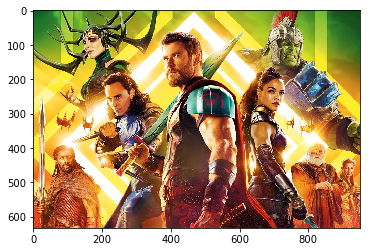

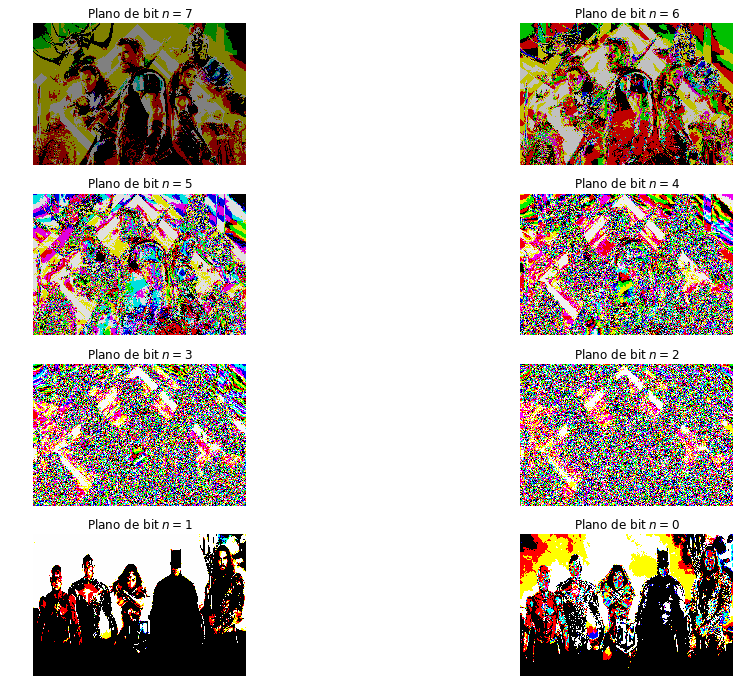

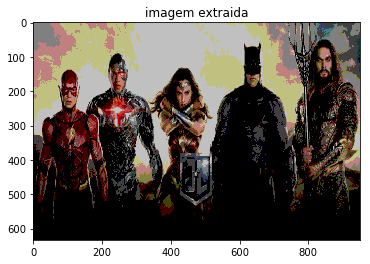

In [16]:
# Obtém o n-ésimo plano de bits de img
def getbitplane(img, n):
    
    # garante que o tipo da imagem é uint8
    if img.dtype != np.uint8:
        raise TypeError('A imagem deve ser do tipo uint8')
    
    # cria máscara
    mask = 2**n
    
    # obtém canais RGB
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    # calcula os planos de bits (bitwise and)
    plane_r = r & mask
    plane_g = g & mask
    plane_b = b & mask
    
    # cria nova imagem
    bplane = np.zeros(img.shape)
    bplane[:,:,0] = plane_r
    bplane[:,:,1] = plane_g
    bplane[:,:,2] = plane_b
    
    return bplane

plb.figure()
plb.imshow(imgRGB)
            
plb.figure(figsize=(16,12))
for n in range(8):
        plb.subplot(4,2,8 - n )  
        plb.imshow(getbitplane(simg, n))
        plb.axis('off')
        plb.title('Plano de bit $n={}$'.format(n))
        
        
recimg = unstego_img(simg)
hash2 = hashlib.md5(recimg)
print('Imagem extraída igual a adicionada?')
print(hash2.digest() == hash1.digest())
plb.figure()
plb.imshow(recimg)    
plb.title('imagem extraida')

### 5 Formas de Detecção 
Uma grande dificuldade de agencias de segurança/analise de dados é saber se foi aplicado alguma forma de esteganografia. Existem alguns metodos básicos para verificar , por exemplo como fizemos acima , analisando os planos de bits. Podemos perceber que nos planos 0 e 1 existe uma discrepância e podemos perceber a silhueta da nossa imagem escondida. Isso só aconteceu pois alocamos todos os nossos dados sequencialmente nos bits 0 e 1 de cada pixel. Poderiamos ter adicionado os bits de forma diferente usando uma função que alocassem em posições 'aleatorias', assim não seria facilmente perceptivel.

Outro metodo que pode ser usado é uma analise de histograma no padrão do ruido na imagem , podemos notar diferenças bruscas que podem indicar alguma alteração na imagem original.